### Fitting an exponential: the spread of Covid-19 ###

It is possible to use linear least-squares to fit certain nonlinear relationships that can be converted to a linear relationship by a transformation.  Here, we intend to fit the reported Covid-19 cases in Germany to an exponential growth model,
$$ I = c \, e^{rt} \,.$$
Taking the natural logarithm of this expression, we find that
$$ \ln I = \ln c + r t \,.$$
This is a linear relationship between $t$, here the time from the first reported outbreak measured in days, and $\ln I$, the logarithm of the number of reported infections.

In the following, I show how to do this fit in Python.  We begin by loading `pylab` which pulls in a number of extensions for linear algebra and plotting.

In [1]:
from pylab import *

The case data for Germany was taken from __[Wikipedia](https://de.wikipedia.org/w/index.php?title=COVID-19-Pandemie_in_Deutschland&oldid=197892011)__, originally provided by the Robert-Koch institute.  There are two time series.  The older, starting on February 24, was curated manually and discontinued on March 17 due to the large increase in the number of cases which made manual collection unfeasible.  

We store the time series as an `array` object, which is the Numerical Python representation of a vector.

In [2]:
cases = array([16,  18,  21,  26,  53,  66,  117, 150, 188, 240, 400, 639, 795, 902, 1139,1296,1567,2369,3062,3795,4838, 6012])

The second time series contains only electronically reported cases and was started on March 10.  Since it is still relatively short, we take the first time series and comment this one out.

In [3]:
#cases = array([1296, 1567, 1892, 2576, 3421, 4195, 5433, 7156, 8198])

Let $N$ denote the number of days in the time series and $t$ denote the vector of days, starting at $0$ for February 24.

In [4]:
N = len(cases)
t = arange(N)

Now we assemble the matrix 
$$A = \begin{pmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \\ \vdots & \vdots \\ 1 & N-1 \end{pmatrix} \,.$$

In [5]:
A = c_[ones(N),t]
print(A)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]]


We can directly code up the solution to the normal equations,
$$ x = (A^TA)^{-1}A^T b $$
where $b$ is the vector containing the logarithm of the number of reported cases.  (Note that this formulation is neither the computationally most efficient nor the most robust way to solve a least square problem; there are dedicated least square solvers available.  But for this small data set, the approach shown is fully adequate.)  Note that matrix multiplication is represented by `@` in Numerical Python.

In [6]:
x = inv(A.T @ A) @ A.T @ log(cases)

Now we can plot the case data.  Note that the first component `x[0]` of the solution vector contains $\ln c$, the second component `x[1]` of the solution vector contains the rate constant $r$.  So we write the fitting function as
$$ I(t) = \exp(\ln c + rt) \,.$$

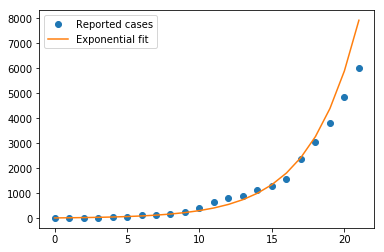

In [7]:
def I(t):
    return exp(x[0] + x[1]*t)

plot(t,cases,"o",label='Reported cases')
plot(t,I(t),label='Exponential fit')
legend();

A important characteristic of exponential growth is the doubling time, i.e. the time $T$ it takes for the number of cases to double.  Solving $I(t+T) = 2 \, I(T)$ for $T$ gives
$$ T = \frac{\ln 2}{r} \,.$$
For this data set, we compute the doubling time 

In [8]:
log(2)/x[1]

2.3487487037102484

So the number of reported cases doubles every $2.5$ days!  Pretty scary, even though the growth seems to slow down toward the end of the data set, but that could also be a temporary fluctuation.

For comparison, we can also try to fit a quadratic polynomial to the data:

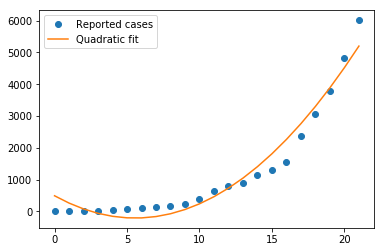

In [9]:
B = c_[ones(N),t,t**2]
y = inv(B.T @ B) @ B.T @ cases

def q(t):
    return y[0] + y[1]*t + y[2]*t**2

plot(t,cases,'o',label='Reported cases')
plot(t,q(t),label='Quadratic fit')
legend();

We see that the growth rate accellerates too rapidly to be well-represented by a quadratic.